## Aim:  Identify commercial centers using Points of Interest (POI) data

In [1]:
# Importing Libraries Required
import geopandas as gpd # for handling geojson data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline


In [2]:
# loading geojson file downloaded using overpass turbo query -> all amenities around Delhi (radius of 5km)
data = gpd.read_file("delhi.geojson")

## Data Exploration And Preprocessing

In [3]:
data.head()

,id,@id,admin_level,amenity,boundary,name,type,addr:street,building,name:de,...,dance:teaching,theatre:type,operator:type,backrest,seats,branch:type,drink:shake,addr:subdistrict,waste,geometry
0,relation/3859752,relation/3859752,10,university,administrative,Delhi University (North Campus),boundary,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.22017 28.69272, 77.21966 28.69302..."
1,relation/3926057,relation/3926057,None,place_of_worship,None,Jama Masjid,multipolygon,Meena Bazaar,yes,Freitagsmoschee,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.23283 28.65117, 77.23285 28.65099..."
2,relation/5246853,relation/5246853,None,marketplace,None,Wholesale Spice Market,multipolygon,None,yes,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.22145 28.65692, 77.22148 28.65638..."
3,relation/5247847,relation/5247847,None,courthouse,None,None,multipolygon,None,yes,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.23391 28.61606, 77.23344 28.61535..."
4,relation/5251171,relation/5251171,None,post_office,None,Postal Directorate,multipolygon,Sansad Marg,yes,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.21243 28.62242, 77.21304 28.62207..."


In [4]:
# All the amenities in the data
data['amenity'].unique()

array(['university', 'place_of_worship', 'marketplace', 'courthouse',
       'post_office', 'parking', 'fairground', 'hospital', 'bus_station',
       'college', 'police', 'school', 'grave_yard', 'fire_station',
       'fast_food', 'cinema', 'library', 'public_building', 'townhall',
       'office', 'toilets', 'fuel', 'theatre', 'social_facility',
       'language_school', 'restaurant', 'music_school;dancing_school',
       'arts_centre', 'kindergarten', 'boat_rental', 'bank', 'post_box',
       'atm', 'memorial', 'veterinary', 'pub', 'cafe', 'club',
       'Drinking_Water', 'car_rental', 'bar', 'fountain',
       'bicycle_parking', 'baby_hatch', 'community_centre', 'clinic',
       'doctors', 'bureau_de_change', 'pharmacy', 'waste_basket',
       'drinking_water', 'taxi', 'embassy', 'dentist', 'bicycle_rental',
       'food_court', 'vending_machine', 'nightclub', 'waste_disposal',
       'ice_cream', 'shelter', 'music_school', 'disused', 'internet_cafe',
       'bench', 'charging_stat

In [5]:
data['amenity'].value_counts()

restaurant                     114
toilets                        104
place_of_worship                86
atm                             80
school                          74
parking                         68
bank                            58
fast_food                       52
cafe                            48
fuel                            38
college                         31
police                          26
hospital                        20
bus_station                     18
bar                             16
drinking_water                  16
library                         13
theatre                         12
bicycle_rental                  11
post_office                     11
marketplace                     11
waste_basket                    11
courthouse                      10
grave_yard                       8
university                       7
arts_centre                      7
fire_station                     7
cinema                           7
pharmacy            

## Clustering of POIs

In [7]:
dummy_var=pd.get_dummies(data['amenity'])


In [8]:
x = dummy_var.reset_index().values


In [9]:
from kmodes import kmodes
import random

In [11]:
km = kmodes.KModes(n_clusters=10, init='Cao', n_init=1, verbose=0,random_state=3425)
clusters = km.fit_predict(x)
dummy_var['clusters'] = clusters

In [13]:
kmodes = km.cluster_centroids_
data_concat=pd.concat([data['amenity'],dummy_var],axis=1)
result_cluster = data_concat.groupby('clusters')

In [14]:
result_cluster['amenity'].unique()

clusters
0    [university, marketplace, courthouse, post_off...
1                                            [toilets]
2                                   [place_of_worship]
3                                                [atm]
4                                             [school]
5                                            [parking]
6                                               [bank]
7                                          [fast_food]
8                                               [cafe]
9                                               [fuel]
Name: amenity, dtype: object

In [15]:
data_concat['geometry']=data['geometry']


In [16]:
result = data_concat[['amenity','clusters','geometry']]


In [26]:
result['clusters'] = result['clusters'].replace(to_replace=[0],value='others')
result['clusters'] = result['clusters'].replace(to_replace=[1,2],value='basic')
result['clusters'] = result['clusters'].replace(to_replace=[3,6],value='banking')
result['clusters'] = result['clusters'].replace(to_replace=[4],value='education')
result['clusters'] = result['clusters'].replace(to_replace=[5,9],value='transport_service')
result['clusters'] = result['clusters'].replace(to_replace=[7,8],value='food')


In [37]:
result.head()

,amenity,clusters,geometry
0,university,others,"POLYGON ((77.22017 28.69272, 77.21966 28.69302..."
1,place_of_worship,basic,"POLYGON ((77.23283 28.65117, 77.23285 28.65099..."
2,marketplace,others,"POLYGON ((77.22145 28.65692, 77.22148 28.65638..."
3,courthouse,others,"POLYGON ((77.23391 28.61606, 77.23344 28.61535..."
4,post_office,others,"POLYGON ((77.21243 28.62242, 77.21304 28.62207..."


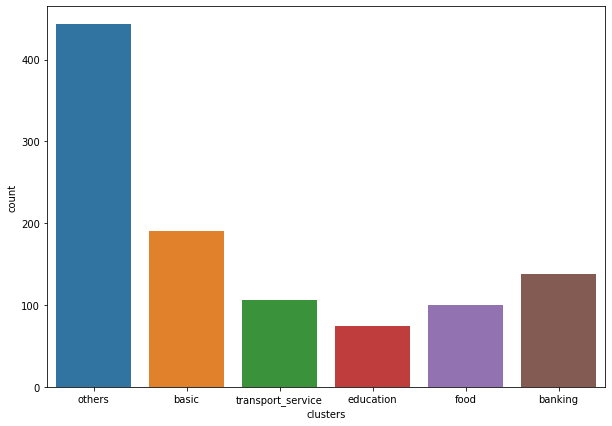

In [28]:
plt.subplots(1, figsize=(10,7))
sns.countplot(x='clusters',data=result)

In [31]:
result = gpd.GeoDataFrame(result, geometry='geometry')

In [32]:
df = gpd.GeoDataFrame(result)

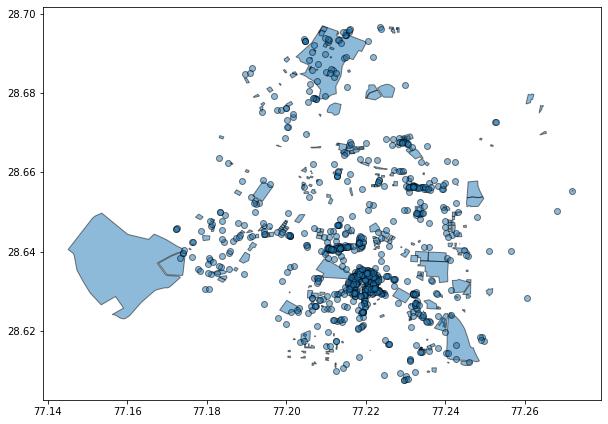

In [34]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')


In [ ]:
# Export Shapefile
import fiona
result.to_file('delhi_5km.shp', driver='ESRI Shapefile')